<a href="https://colab.research.google.com/github/Chontell/Prediction-report-on-US-Accident/blob/master/cars_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                **Prediction report on US-Accident**




In recent years, road accidents have become a universal problem and are considered a significant cause of accidents. Road accidents put enormous impact on the economy of a country, public, society and environment. It is totally inappropriate and disheartening to see the people dying from road accidents. Almost every day, thousands of people lost their lives due to road accidents. It is observed that residential and shopping areas are riskier than less populated areas just because of higher exposure. Reducing the chance of road accidents is a very dominating and challenging topic of research. For handling this stagger issue, deep analysis of accident dataset is required. Accurate, huge and clean dataset of accidents is the basis of our prediction. Here we use some machine learning and deep learning models for analysis and prediction of road accidents. We also find out the relationship and effect of different variables on the occurrence of road accidents.

**DataSource**
A New dataset with the name “US Accident” has been used here which includes almost 2.25 million instances of traffic accidents that took place within the contiguous United States1 between February 2016 and March 2019. This data can be found "https://smoosavi.org/datasets/us_accidents
". For creating this dataset, two important methods are used; streaming traffic reports and heterogeneous contextual data (weather, points-of-interests, etc.).

Mount Your Google drive

---



---


If you have dataset at your PC, then you don't need to access google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Basic Libraries of Python

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
import heapq, random
import plotly.graph_objects as go
import sklearn.metrics as metrics
import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read Dataset From Google drive

In [ ]:
DataGD = pd.read_csv('/content/drive/My Drive/US_Accidents_June20.csv')

Three columns that feed time as a string data type need to convert these string formats to data-time formats

In [ ]:
OneDate=DataGD['Start_Time']
TwoDate=DataGD['End_Time']
ThreeDate=DataGD['Start_Time']
DataGD['Start_Time'] = pd.to_datetime(OneDate)
DataGD['End_Time'] = pd.to_datetime(TwoDate)
DataGD['WD']=DataGD['Start_Time'].dt.strftime('%a')

**Week Wise Accident Analysis** 
According to our data we insight that most of the accidents take place during working days because everyone is in a rush and tries to reach out to their destination as soon as possible. In most of the cases, this rushing became a reason of danger.


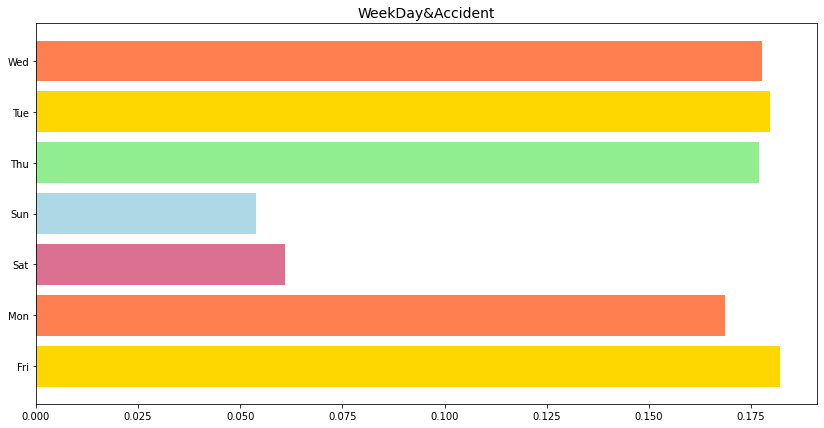

In [ ]:
fig, ax=plt.subplots(figsize=(14,7))
above = DataGD.groupby('WD').count()
div=above.sum()
ax.barh(list((above/div).index), list((above/div).ID), color = ['gold', 'coral','palevioletred', 'lightblue','lightgreen'])
plt.title('WeekDay&Accident',fontsize=14);

**Visualizing Wind Direction**
Here we visualize the wind direction with its counts within the whole dataset. Here south, SSW, S, SSE, SE, SW are considered South direction. Same for all other directions.


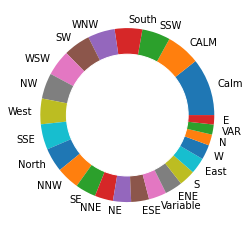

In [ ]:
Graph2_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(Graph2_circle)
Graph2=DataGD['Wind_Direction']
plt.pie(list((Graph2.value_counts()).values), labels=list((Graph2.value_counts()).index))
plt.show()


**Accident relationship with state**
Here we observe the relationship between the number of accidents and state. We observed that the highest number of accidents occurred at CA state. All other states have also been having high scores but almost 3 times less than CA. We also observed that SC and NC had almost similar number of accidents. 


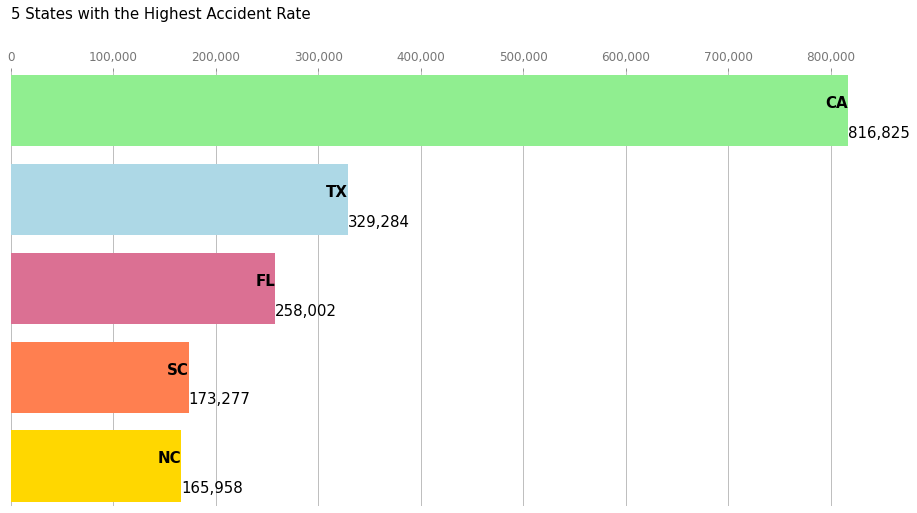

In [ ]:
fig, ax=plt.subplots(figsize=(15,8))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, '5 States with the Highest Accident Rate',
            transform=ax.transAxes, size=15, weight=15, ha='left')
DataGD_sate = DataGD.groupby('State').size().to_frame('Counts')
DataGD_sate = DataGD_sate.reset_index().sort_values('Counts', ascending = False)[:5]
DataGD_sate = DataGD_sate[::-1] 
a=DataGD_sate['State']
b=DataGD_sate['Counts']
ax.barh(a, b, color = ['gold', 'coral','palevioletred', 'lightblue','lightgreen'])
for i, (Left, Right) in enumerate(zip(b, a)):
        ax.text(Left, i,     Right,           size=15, weight=700, ha='right', va='bottom')
        ax.text(Left, i-.25,     f'{Left:,.0f}',  size=15, ha='left',  va='center')
        
plt.box()

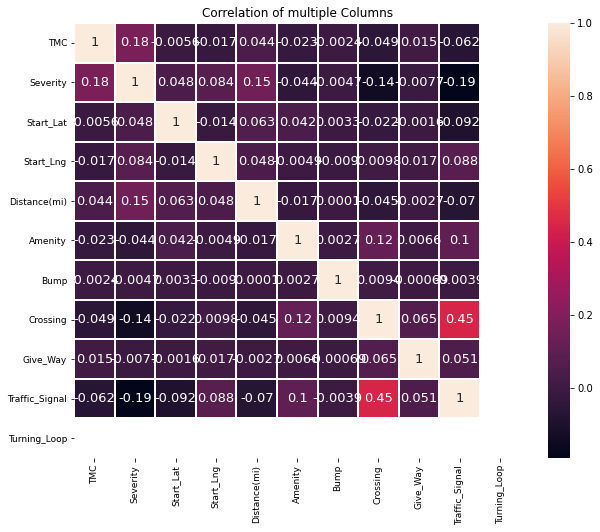

In [ ]:
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Correlation of multiple Columns') 
selection=['Source', 'TMC', 'Severity',
       'Start_Lat', 'Start_Lng', 'Distance(mi)','Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way','Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']
Correlated_columns_names=DataGD[selection]
aa=Correlated_columns_names.corr()
FIGURE=sns.heatmap(aa,
                annot=True,cmap='rocket',linewidths=0.99,annot_kws={'size':13})
FIGURE=plt.gcf()
FIGURE.set_size_inches(10,8)
plt.show()

**Calculation of target variable**
Severity is our target column that contains 4 types from 1 to 4, where 1 represents the least impact on traffic and 2 shows greater than least impact, 3 shows huge impact that is greater than 2 but less than 4 and severity 4 mean significant impact on  traffic. We observed that almost 67.5% of records have severity 2, and severity 3 is 28%. In our prediction, all severity is important because we want to predict the dangerous situation for handling this in advance. Here severity 4 is only 3.2%.


([<matplotlib.patches.Wedge at 0x7f89f66f4278>,
 [Text(1.2995577462014514, 0.033906699748052244, 'Severity 1'),
  Text(-0.6241052769892766, 0.905810467611265, 'Severity 2'),
  Text(0.5048265975206929, -0.9773178124006953, 'Severity 3'),
  Text(1.094457560896949, -0.11028439325444706, 'Severity 4')],
 [Text(0.7997278438162776, 0.020865661383416764, '0.8%'),
  Text(-0.340421060175969, 0.49407843687887176, '67.5%'),
  Text(0.27535996228401427, -0.5330824431276519, '28.4%'),
  Text(0.5969768513983357, -0.06015512359333475, '3.2%')])

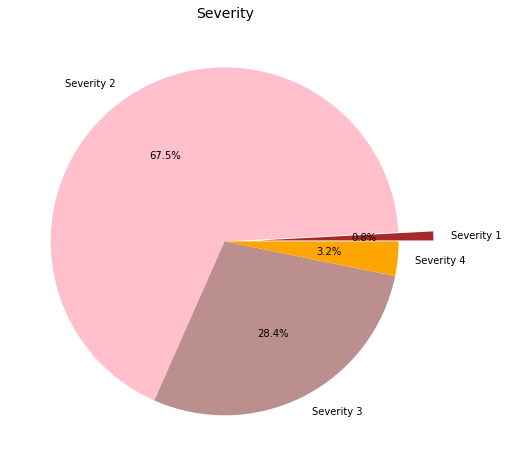

In [ ]:
plt.figure(figsize=(9,8))
Graph5=DataGD.groupby('Severity')
Graph51=Graph5.size()
Graph51_size=14
plt.title('Severity',fontsize=Graph51_size);
name_list=[1,2,3,4]
seperate_area=(0.2,0,0,0)
Graph51=Graph51[name_list]
plt.pie(Graph51,
        colors = ['brown','pink', 'rosybrown', 'orange'],
        labels= ['Severity 1','Severity 2','Severity 3','Severity 4'],
        explode = seperate_area, 
        autopct = ('%1.1f%%'))

Convrt StartTime to hours “end time” is not a useful feature, because it is calculated after an accident. But “start time” is a very important feature for prediction. Unfortunately, Handling with dates is complex in machine learning. Due to this, we extracted hour, week, day, minute from start time and created 5 new columns for the representation of “start time”. 

In [ ]:
change=DataGD['Start_Time']
DataGD['HHH']=change.dt.hour
n_m=DataGD['Start_Time'].dt.month
DataGD['MON']=n_m
date=np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
abc=[]
for i in n_m.values:
  abc.append(date[i-1])
C=DataGD["Start_Time"].dt.day.values
DataGD['Current_Day']=abc + C
A=DataGD['HHH']*60.0
B=DataGD["Start_Time"].dt.minute
DataGD['Min']=A+B

**Hour Wise Accidents Relation**
Now we analyze the accident rate at each hour of a day. We observed that, according to our data most of the accident take place at 7 or 8 o'clock of morning. 


Text(0, 0.5, '#of accidents')

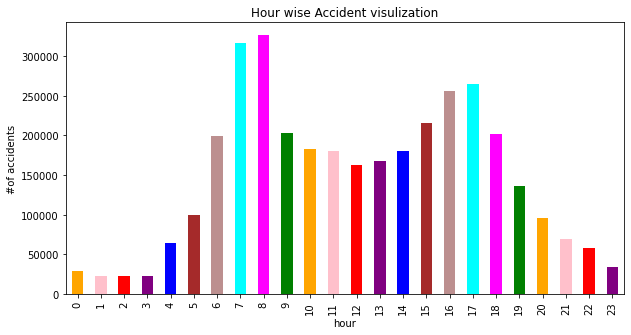

In [ ]:
plt.figure(figsize =(10,5))
plt.title('Hour wise Accident visulization')
PLOT_THIS1=DataGD.groupby(['HHH'])
PLOT_THIS2=PLOT_THIS1.size()
PLOT_THIS2.plot.bar(color=['orange','pink','red','purple','blue','brown','rosybrown','cyan','magenta','green'])
plt.xlabel('hour')
plt.ylabel('#of accidents')

**Relationship between weather and Accident**
Weather is the most important factor in accident prediction because mostly accidents occur in fog and cloudy weather. But according to our data visualization, a lot of accidents occur in clear weather (300000). Accidents that occur in clear weather hold some other reason. Similarly, most of the accidents occur in cloudy weather. 


Text(0.5, 1.0, 'RelationShip of Weather and number of Accident')

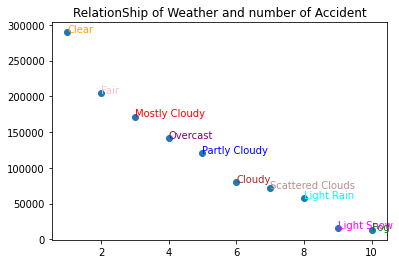

In [ ]:
Graph7=DataGD.groupby('Weather_Condition')
Graph71 =Graph7.count()
a=list(Graph71.index)
bb=heapq.nlargest(10, Graph71.Number)
l=[]
for i in range(10):
  b=list(Graph71.Number)
  ind=b.index(bb[i])
  l.append(ind)
aa = [a[i] for i in l] 
y = bb
z = list(range(1,11))
n = aa
fig, ax = plt.subplots()
ax.scatter(z, y)
c=['orange','pink','red','purple','blue','brown','rosybrown','cyan','magenta','green']
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]),color=c[i])
plt.title('RelationShip of Weather and number of Accident')

**Relationship between Number, State and severity**
Here we plot three things in one plot, one is state that shows different states of US, second one is number of accidents occur in each state. Each vertical bar represents a different state. Height of each bar shows the number of accidents in the corresponding state. One more thing is two different colors in each bar, these colors divide the accident into two parts severity 1 and 4. Orange color for severity one and blue color for severity 4. We analyze that, almost each state has faced severity 4 accidents. 


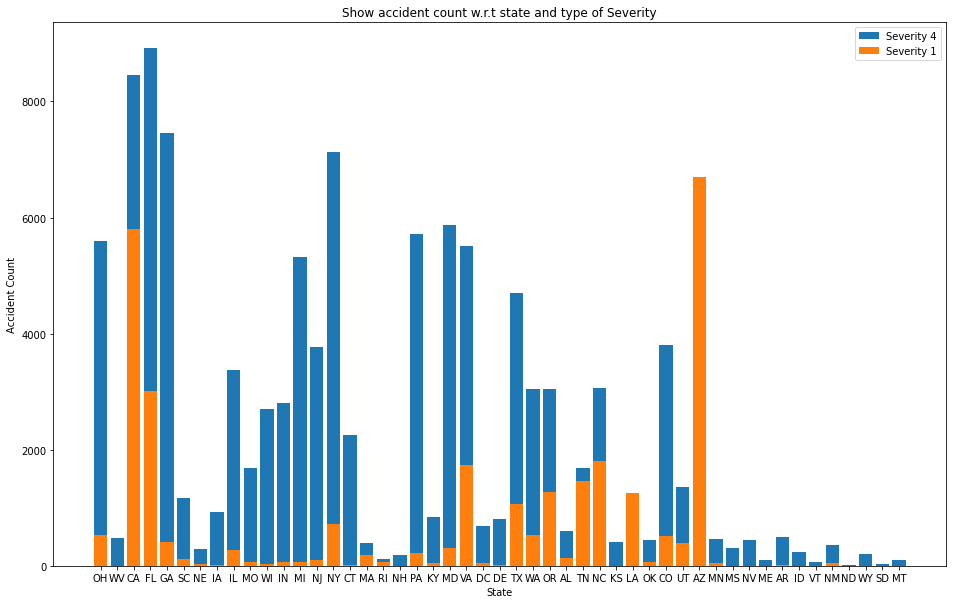

In [ ]:
s1=[]
s4=[]
plt.figure(figsize=(16,10))
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.title('Show accident count w.r.t state and type of Severity')
Graph8_select=DataGD['State']
Graph8_state=Graph8_select.unique()
for i in Graph8_state:
    A=(DataGD['Severity']==1)
    B=(DataGD['State']==i)
    graph8=A&B
    graph81=DataGD[graph8]
    aa=graph81.count()['ID']
    s1.append(aa)
    AA=(DataGD['Severity']==4)
    BB=(DataGD['State']==i)
    graph88=AA&BB
    graph82=DataGD[graph88]
    bb=graph82.count()['ID']
    s4.append(bb)
plt.bar(Graph8_state, s4, label='Severity 4')
plt.bar(Graph8_state, s1, label='Severity 1')
plt.legend()

**Data Cleaning and Preprocessing**

Print Dataset

In [ ]:
DataGD

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,WD,HHH,MON,Current_Day,Min
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Mon,5,2,39,346.0
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Mon,6,2,39,367.0
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,Mon,6,2,39,409.0
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,Mon,7,2,39,443.0
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Mon,7,2,39,459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Fri,18,8,235,1083.0
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Fri,19,8,235,1151.0
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Fri,19,8,235,1140.0
3513615,A-3513779

First, we looked at the summation of missing values in our	dataset.

In [ ]:
DataGD.isnull().sum(axis = 0)

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

Few of the columns like 'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',’City’,’Zipcode’,’Airportcode’ contain a small number of missing values. We simply dropped these rows because dropping does not put a huge impact on 2.25 million records. 

In [ ]:
DataGD=DataGD.dropna(subset=['Wind_Direction','Weather_Condition'])
DataGD=DataGD.dropna(subset=['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','City','Zipcode','Airport_Code'])

We then looked at “Number”, “Precipitation(in)” and “Windchill(F)” features contain almost 70% missing values. We simply dropped these features because these features do not have any high impact on the target column. 

According to the dataset description TMC, “End lat”, “End lag” and “Distance(mi)” all values are calculated after the accident occurred. That’s why using those features for prediction of accidents is not very helpful. Thus we also got rid of these columns by dropping them.

Almost all features contain >=2 unique values but “country” is the same for all records because we perform prediction analysis on the US. That is why using this column for prediction is useless. We simply dropped this column, too, from whole records.  One more column “Turning Loop” is the same for all records that indicate the presence of a turning loop. That’s why we also deleted this feature from our dataset. Feature “Id” is just the representation of each record, having no relationship with prediction. So we simply ignored this feature during prediction. 

Three columns that feed time as a string data type need to convert these string formats to data-time formats. After conversion of time, we observed that the difference between “weather time” and “start time” is zero. It means these two columns are almost similar. So we took only one of them. 

In [ ]:
DataGD=DataGD.drop(['Country','Weather_Timestamp','ID','Number','Description','Turning_Loop','Wind_Chill(F)','Precipitation(in)','TMC','End_Lng','End_Lat','Distance(mi)'],axis=1)

As we know that, our dataset has been collected from two sources. One is MapQuest and the second is Bing. MapQuest sources give all accident data which belong to severity 3 and severity 2. There is no record that belongs to severity 1 and severity 4. On the other side Bing records belong to all four types of severities. As we observed that there is no similar proportion of MapQuest and Bing data collection. These differences show that both datasets are related to accidents, but they consider different definitions of severity. If we analyze source feature relation with different columns, we observe that MapQuest is given more accurate information rather than Bing. So, simply dropped rows that contained the source as Bing. 

In [ ]:
DataGD=DataGD.loc[DataGD['Source']=="MapQuest"]
DataGD=DataGD.drop(['Source'], axis=1)

As some columns with numeric data type contained a lot of missing values. Firstly, we grouped those columns according to “Airport code” or “month”. Secondly, took mean of each group. At the end, missing values were replaced by the mean value of each group. But after this pre-processing, still we had some null values in these columns. We simply dropped Null rows but keeping in mind that dropping rows decrease the size of our dataset but not that much.

In [ ]:
DataGD['Temperature(F)']=DataGD.groupby(['Airport_Code','MON'])['Temperature(F)'].apply(lambda x: x.fillna(x.mean()))
DataGD['Humidity(%)']=DataGD.groupby(['Airport_Code','MON'])['Humidity(%)'].apply(lambda x: x.fillna(x.mean()))
DataGD['Pressure(in)']=DataGD.groupby(['Airport_Code','MON'])['Pressure(in)'].apply(lambda x: x.fillna(x.mean()))
DataGD['Visibility(mi)']=DataGD.groupby(['Airport_Code','MON'])['Visibility(mi)'].apply(lambda x: x.fillna(x.mean()))
DataGD['Wind_Speed(mph)']=DataGD.groupby(['Airport_Code','MON'])['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean()))
DataGD=DataGD.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)'])

Moving towards categorical features, used Label Encoder and get_dummies  technique for preprocessing Amenity, Bump, Crossing, Giveaway, Junction, No Exit, Railway, Roundabout, Station, Stop, Traffic Calming, Traffic Signal, Side, State, Sunrise Sunset, Civil Twilight, Nautical Twilight, Astronomical Twilight features.
Divided the dataset into two parts, the training part and the test part. Severity being considered as a testing variable and all other remaining variables have been considered as Training data. After separating the data into two parts, applied StandardScaler machine learning technique that standardized the features by subtracting the estimation mean and scaled it to unit variance. 


In [ ]:
label_encoder = preprocessing.LabelEncoder()
DataGD['Sunrise_Sunset'] = label_encoder.fit_transform(DataGD['Sunrise_Sunset'])
DataGD['Civil_Twilight'] = label_encoder.fit_transform(DataGD['Civil_Twilight'])
DataGD['Nautical_Twilight'] = label_encoder.fit_transform(DataGD['Nautical_Twilight'])
DataGD['Give_Way'] = label_encoder.fit_transform(DataGD['Give_Way'])
DataGD['Junction'] = label_encoder.fit_transform(DataGD['Junction'])
DataGD['Amenity'] = label_encoder.fit_transform(DataGD['Amenity'])
DataGD['Bump'] = label_encoder.fit_transform(DataGD['Bump'])
DataGD['Crossing'] = label_encoder.fit_transform(DataGD['Crossing'])
DataGD['Roundabout'] = label_encoder.fit_transform(DataGD['Roundabout'])
DataGD['Station'] = label_encoder.fit_transform(DataGD['Station'])
DataGD['Stop'] = label_encoder.fit_transform(DataGD['Stop'])
DataGD['Traffic_Calming'] = label_encoder.fit_transform(DataGD['Traffic_Calming'])
DataGD['Traffic_Signal'] = label_encoder.fit_transform(DataGD['Traffic_Signal'])
DataGD['Side'] = label_encoder.fit_transform(DataGD['Side'])
DataGD['State'] = label_encoder.fit_transform(DataGD['State'])
DataGD['No_Exit'] = label_encoder.fit_transform(DataGD['No_Exit'])
DataGD['Railway'] = label_encoder.fit_transform(DataGD['Railway'])
DataGD['Astronomical_Twilight'] = label_encoder.fit_transform(DataGD['Astronomical_Twilight'])
DataGD=DataGD.drop(['Street', 'City', 'County', 'Zipcode','Wind_Direction','Weather_Condition','Airport_Code','Start_Time','End_Time'],axis=1)
cat=['Timezone', 'WD', 'MON', 'HHH']
DataGD[cat]=DataGD[cat].astype('category')
DataGD=pd.get_dummies(DataGD, columns=cat, drop_first=True)

Now check Null values of dataset

In [ ]:
DataGD.isnull().sum(axis = 0)

Severity     0
Start_Lat    0
Start_Lng    0
Side         0
State        0
            ..
HHH_19       0
HHH_20       0
HHH_21       0
HHH_22       0
HHH_23       0
Length: 71, dtype: int64

In [ ]:
DataGD

,Severity,Start_Lat,Start_Lng,Side,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Current_Day,Min,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,WD_Mon,WD_Sat,WD_Sun,WD_Thu,WD_Tue,WD_Wed,MON_2,MON_3,MON_4,MON_5,MON_6,MON_7,MON_8,MON_9,MON_10,MON_11,MON_12,HHH_1,HHH_2,HHH_3,HHH_4,HHH_5,HHH_6,HHH_7,HHH_8,HHH_9,HHH_10,HHH_11,HHH_12,HHH_13,HHH_14,HHH_15,HHH_16,HHH_17,HHH_18,HHH_19,HHH_20,HHH_21,HHH_22,HHH_23
0,3,39.865147,-84.058723,2,33,36.9,91.0,29.68,10.0,9.690217,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,39,346.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,39.928059,-82.831184,1,33,37.9,100.0,29.65,10.0,9.709274,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,39,367.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,39.063148,-84.032608,2,33,36.0,100.0,29.67,10.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,39,409.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,39.747753,-84.205582,2,33,35.1,96.0,29.64,9.0,4.600000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,39,443.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,39.627781,-84.188354,2,33,36.0,89.0,29.65,6.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,39,459.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478813,3,34.495808,-118.623932,2,3,100.0,18.0,28.85,10.0,5.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,242,1121.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2478814,3,34.031322,-118.433723,2,3,77.0,64.0,29.69,10.0,5.800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,242,1139.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2478815,3,34.106785,-117.369102,1,3,102.2,16.0,29.73,6.0,5.800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,242,1137.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2478816,3,33.924686,-118.103981,2,3,88.0,39.0,29.68,10.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,242,1189.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
DataGD.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Current_Day', 'Min',
       'Timezone_US/Eastern', 'Timezone_US/Mountain', 'Timezone_US/Pacific',
       'WD_Mon', 'WD_Sat', 'WD_Sun', 'WD_Thu', 'WD_Tue', 'WD_Wed', 'MON_2',
       'MON_3', 'MON_4', 'MON_5', 'MON_6', 'MON_7', 'MON_8', 'MON_9', 'MON_10',
       'MON_11', 'MON_12', 'HHH_1', 'HHH_2', 'HHH_3', 'HHH_4', 'HHH_5',
       'HHH_6', 'HHH_7', 'HHH_8', 'HHH_9', 'HHH_10', 'HHH_11', 'HHH_12',
       'HHH_13', 'HHH_14', 'HHH_15', 'HHH_16', 'HHH_17', 'HHH_18', 'HHH_19',
       'HHH_20', 'HHH_21', 'HHH_22', 'HHH_23'],
      dtype='object')

Select features and output columns names.

In [ ]:
Expected_output=DataGD['Severity']
Input_Data=DataGD[['Start_Lat', 'Start_Lng', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Current_Day', 'Min',
       'Timezone_US/Eastern', 'Timezone_US/Mountain', 'Timezone_US/Pacific',
       'WD_Mon', 'WD_Sat', 'WD_Sun', 'WD_Thu', 'WD_Tue', 'WD_Wed', 'MON_2',
       'MON_3', 'MON_4', 'MON_5', 'MON_6', 'MON_7', 'MON_8', 'MON_9', 'MON_10',
       'MON_11', 'MON_12', 'HHH_1', 'HHH_2', 'HHH_3', 'HHH_4', 'HHH_5',
       'HHH_6', 'HHH_7', 'HHH_8', 'HHH_9', 'HHH_10', 'HHH_11', 'HHH_12',
       'HHH_13', 'HHH_14', 'HHH_15', 'HHH_16', 'HHH_17', 'HHH_18', 'HHH_19',
       'HHH_20', 'HHH_21', 'HHH_22', 'HHH_23']]

In [ ]:
Input_Data_New= StandardScaler().fit_transform(Input_Data)

Divided preprocessed data into train and test parts and used a different model for prediction.

In [ ]:
Features_train, Features_test, Expected_output_train, Expected_output_test=train_test_split(Input_Data_New, Expected_output, test_size=0.20, random_state=42)

**Predictive Modeling**
There are two types of models that can be used to predict severity of accidents, one is regression and another one is classification. Regression models can provide additional information on the severity of accidents, while classification models focus on the probabilities of an accident belongs to severity. The underlying algorithms are similar between regression and classification models, but different audience may prefer one over the other. Therefore, in this study, I carried out both regression and classification modeling.


**Regression Model**
Regression is a form of predictive modeling, that is mostly used for extracting the relationship between input or target variable. There are a lot of regression models, but it is impossible to find out which one is superior to all other. That’s why, I applied different regression models (LinearRegression, DecisionTreeRegressor, RandomForestRegressor) using MSE, MAE, RMS as the evaluation metric. All models used same training data and same test data so that there should be the standard criteria for comparing the performance of different models. In our target column, there are 4 types of values 1,2,3,4 that show the condition of severity. Although it is a classification problem, but we can solve this problem by using regression as well as classification.
Here in Table2, three regression models have been shown and analyzed based on different evaluation matrices. First, trained those models and compared those three types of errors.


First Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
One_model=RandomForestRegressor(max_depth=10,n_estimators=10)
One_model.fit(Features_train,Expected_output_train)
y_pred=One_model.predict(Features_train)
y_pred_t=One_model.predict(Features_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Expected_output_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Expected_output_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Expected_output_train, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(Expected_output_test, y_pred_t))  
print('Mean Squared Error:', metrics.mean_squared_error(Expected_output_test, y_pred_t))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Expected_output_test, y_pred_t)))

Mean Absolute Error: 0.32594866678869033
Mean Squared Error: 0.16590242515893192
Root Mean Squared Error: 0.40731121413353194
Mean Absolute Error: 0.3270849713473035
Mean Squared Error: 0.1669426952840784
Root Mean Squared Error: 0.4085862152399153


Second Model

In [ ]:
from sklearn.linear_model import LinearRegression
Two_model=LinearRegression()
Two_model.fit(Features_train,Expected_output_train)
y_pred1=Two_model.predict(Features_train)
y_pred1_t=Two_model.predict(Features_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Expected_output_train, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(Expected_output_train, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Expected_output_train, y_pred1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(Expected_output_test, y_pred1_t))  
print('Mean Squared Error:', metrics.mean_squared_error(Expected_output_test, y_pred1_t))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Expected_output_test, y_pred1_t)))

Mean Absolute Error: 0.38435743824322743
Mean Squared Error: 0.18809481783795873
Root Mean Squared Error: 0.4336989945088168
Mean Absolute Error: 0.38474842082195054
Mean Squared Error: 0.18845010423281564
Root Mean Squared Error: 0.4341084014768842


Third Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Thrid_model=DecisionTreeRegressor()
Thrid_model.fit(Features_train,Expected_output_train)
y_pred2=Thrid_model.predict(Features_train)
y_pred2_t=Thrid_model.predict(Features_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Expected_output_train, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(Expected_output_train, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Expected_output_train, y_pred2)))
print('Mean Absolute Error:', metrics.mean_absolute_error(Expected_output_test, y_pred2_t))  
print('Mean Squared Error:', metrics.mean_squared_error(Expected_output_test, y_pred2_t))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Expected_output_test, y_pred2_t)))

Mean Absolute Error: 7.815904571863096e-05
Mean Squared Error: 4.013811038597866e-05
Root Mean Squared Error: 0.006335464496465801
Mean Absolute Error: 0.12943547704137803
Mean Squared Error: 0.1324482139530157
Root Mean Squared Error: 0.3639343539060523


**Classification models**
Similarly, there are a lot of classification models but it is not possible to find out that the one is superior to all other in each and every scenario. That’s why, I applied different classification model (Logistic Regression, Decision Tree, Random Forest, Ada Boost, Support Vector) using classifier score as the evaluation metric. All models used the same training data and same test data, for keeping the standard criteria for comparing the performance of different models. Classification model are more straight forward. In this scenario, divided the samples into 4 classes such as severity1, severity2, severity3 and severity4. Thus the samples that were close to each other, were considered as member of the same class. In classification problem, probability of the model decides that the current record is belong to which one class.  At the end, the best one model was selected based on their respective Training and testing Score.


First_Model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



model score_train: 0.7065018445887652
model score_test: 0.7066889957825918
[[     0    166     33      0]
 [     0 264426  47655      8]
 [     0  89354  69361      4]
 [     0    823    496      2]]


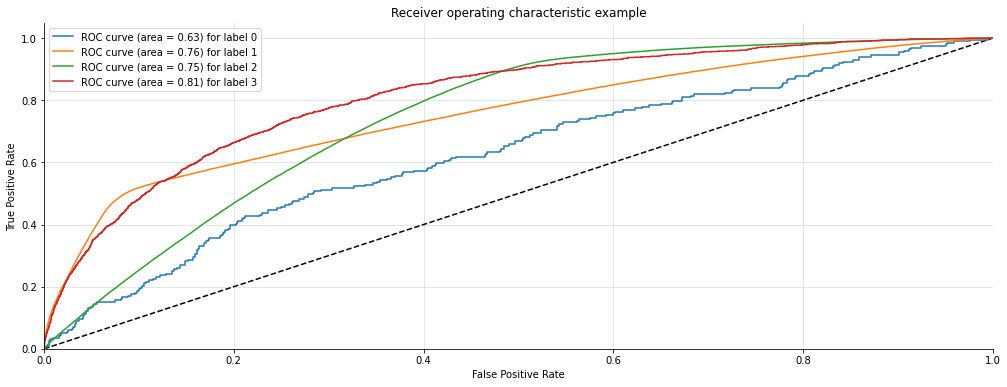

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
one_false_positive_rate=dict()
one_true_positive_rate=dict()
roc_aucure=dict()
figsize=(17, 6)
Classification_model_one=LogisticRegression()
Classification_model_one.fit(Features_train, Expected_output_train) 
y_train_pred3=Classification_model_one.predict(Features_test)  
print(f'model score_train: {Classification_model_one.score(Features_train, Expected_output_train)}')
print(f'model score_test: {Classification_model_one.score(Features_test, Expected_output_test)}')
print(confusion_matrix(Expected_output_test, y_train_pred3))
y_score=Classification_model_one.decision_function(Features_test)
y_test_dummies = pd.get_dummies(Expected_output_test, drop_first=False).values
for i in range(4):
    one_false_positive_rate[i], one_true_positive_rate[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_aucure[i] = auc(one_false_positive_rate[i], one_true_positive_rate[i])
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(4):
    ax.plot(one_false_positive_rate[i], one_true_positive_rate[i], label='ROC curve (area = %0.2f) for label %i' % (roc_aucure[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

Second_model

model score_train: 0.7276450132588088
model score_test: 0.7275410308090987
[[     0    159     40      0]
 [     0 260861  51228      0]
 [     0  75945  82770      4]
 [     0    628    686      7]]


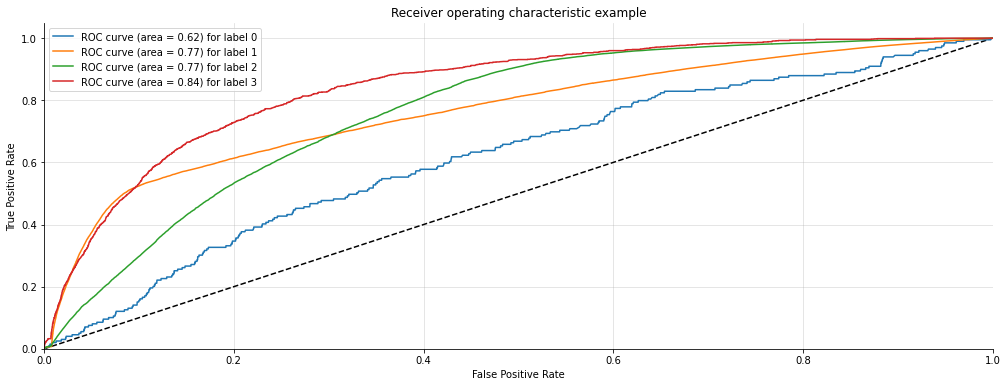

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Classification_model_Two=AdaBoostClassifier()
Classification_model_Two.fit(Features_train, Expected_output_train) 
y_train_pred5=Classification_model_Two.predict(Features_test)  
print(f'model score_train: {Classification_model_Two.score(Features_train, Expected_output_train)}')
print(f'model score_test: {Classification_model_Two.score(Features_test, Expected_output_test)}')
print(confusion_matrix(Expected_output_test, y_train_pred5))
y_score = Classification_model_Two.decision_function(Features_test)
Two_false_positive_rate=dict()
Two_true_positive_rate=dict()
roc_auc = dict()
figsize=(17, 6)
y_test_dummies = pd.get_dummies(Expected_output_test, drop_first=False).values
for i in range(4):
    Two_false_positive_rate[i], Two_true_positive_rate[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(Two_false_positive_rate[i], Two_true_positive_rate[i])
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(4):
    ax.plot(Two_false_positive_rate[i], Two_true_positive_rate[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

Third_Model

model score_train: 0.9999232524043169
model score_test: 0.8707931776223302
[[     0    162     37      0]
 [   215 282526  28981    367]
 [    45  28931 128697   1046]
 [     1    304    939     77]]


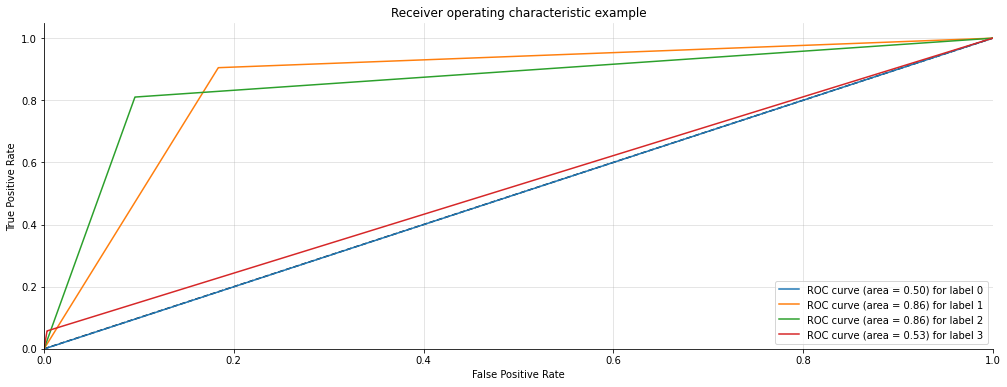

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
Classification_model_Three= DecisionTreeClassifier()
Classification_model_Three.fit(Features_train,Expected_output_train) 
y_train_pred4=Classification_model_Three.predict(Features_test)  
print(f'model score_train: {Classification_model_Three.score(Features_train,Expected_output_train)}')
print(f'model score_test: {Classification_model_Three.score(Features_test,Expected_output_test)}')
print(confusion_matrix(Expected_output_test, y_train_pred4))
y_score =Classification_model_Three.fit(Features_train,Expected_output_train).predict_proba(Features_test)
Three_false_positive_rate=dict()
Three_true_positive_rate=dict()
roc_auc = dict()
figsize=(17, 6)
y_test_dummies = pd.get_dummies(Expected_output_test, drop_first=False).values
for i in range(4):
    Three_false_positive_rate[i], Three_true_positive_rate[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(Three_false_positive_rate[i], Three_true_positive_rate[i])
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(4):
    ax.plot(Three_false_positive_rate[i], Three_true_positive_rate[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

Fourth_Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
Classification_model_four=KNeighborsRegressor()
Classification_model_four.fit(Features_train, Expected_output_train) 
y_train_pred5=Classification_model_four.predict(Features_test)  
print(f'model score_train: {Classification_model_four..score(Features_train, Expected_output_train)}')
print(f'model score_test: {Classification_model_four..score(Features_test, Expected_output_test)}')
print(confusion_matrix(Expected_output_test, y_train_pred6))

model score_train: 0.6523762351218
model score_test: 0.672376153218


[[0, 107, 19, 1],
 [0, 202884, 28616, 365],
 [0, 82052, 30819, 261],
 [0, 8029, 2547, 332]]

As per the requirements, all the tasks have been performed properly. After leniently visualizing and preprocessing the dataset, severity was predicted using different prediction models including regression and classification models. 
Based on the above calculations, it has been concluded that the Decision Tree Regressor and Classifier performed well in this scenario. And achieved almost 100% accuracy score while using as a classifier. Thus severity measure can easily and accurately be predicted using Decision Tree Classifier.
